In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

Base.classes.keys()

['measurement', 'station']

In [6]:
# View all of the classes that automap found
# Assign the variables
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Save references to each table
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [8]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

<Axes: title={'center': 'Precipitation measurement per date for Hawaii'}, xlabel='Date', ylabel='Inches'>

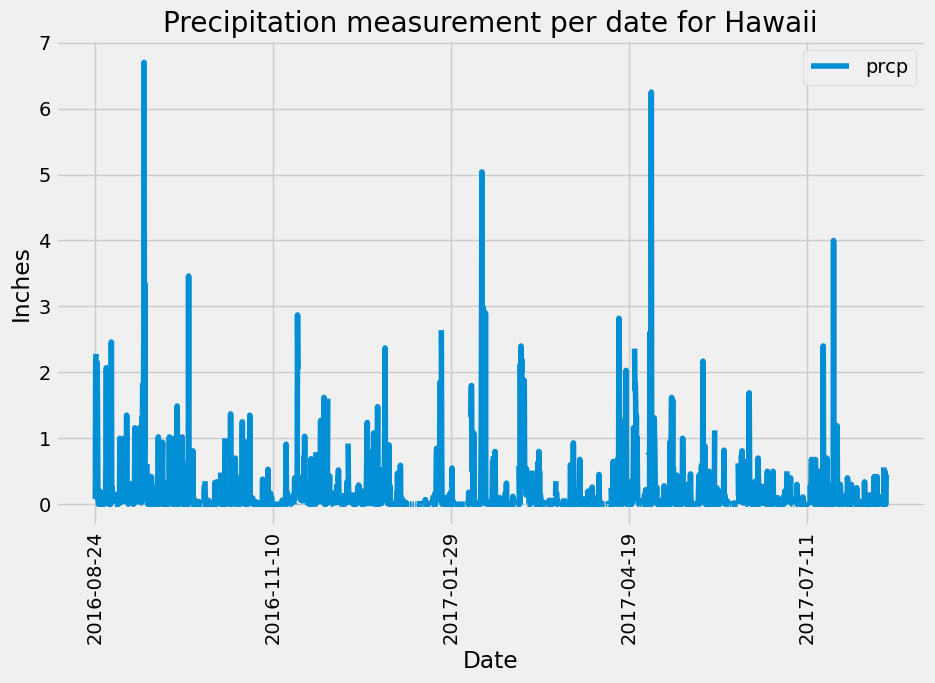

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the date and precipitation scores
df_1 = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_2 = pd.DataFrame(df_1)
df_2

# Sort the dataframe by date
df_3 = df_2.sort_values("date")
df_3

# Use Pandas Plotting with Matplotlib to plot the data
df_3.plot(kind = 'line', x = "date", y = "prcp", title = "Precipitation measurement per date for Hawaii", xlabel = 'Date', ylabel = "Inches", rot=90, figsize=(10,6))


In [10]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_3["prcp"].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [11]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2223 entries, 0 to 2222
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2223 non-null   object 
 1   prcp    2015 non-null   float64
dtypes: float64(1), object(1)
memory usage: 52.1+ KB


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station).count()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
#query = """SELECT
#                station,
#                Count(id) as observation_num
 #           FROM
 #               Measurement
#            GROUP BY
 #               station
#            ORDER BY
#                observation_num desc;
#"""

#df_4 = pd.read_sql(text(query), con=engine)
#df_4.head()

In [14]:
results = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = """SELECT
                min(tobs),
                max(tobs),
                avg(tobs)
            FROM
                Measurement
            WHERE
                station = 'USC00519281'
"""

df_5 = pd.read_sql(text(query), con=engine)
df_5.head()

,min(tobs),max(tobs),avg(tobs)
0,54.0,85.0,71.663781


In [16]:
results_2 = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter (Measurement.station == "USC00519281").all()
results_2

[(54.0, 85.0, 71.66378066378067)]

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = """SELECT
                date,
                station,
                prcp,
                tobs
           FROM
               Measurement
            WHERE
                date >= '2016-08-23'
                AND station = 'USC00519281'
            ORDER BY
                date asc;
"""

df_6 = pd.read_sql(text(query), con=engine)
df_6.head()

,date,station,prcp,tobs
0,2016-08-23,USC00519281,1.79,77.0
1,2016-08-24,USC00519281,2.15,77.0
2,2016-08-25,USC00519281,0.06,80.0
3,2016-08-26,USC00519281,0.01,80.0
4,2016-08-27,USC00519281,0.12,75.0


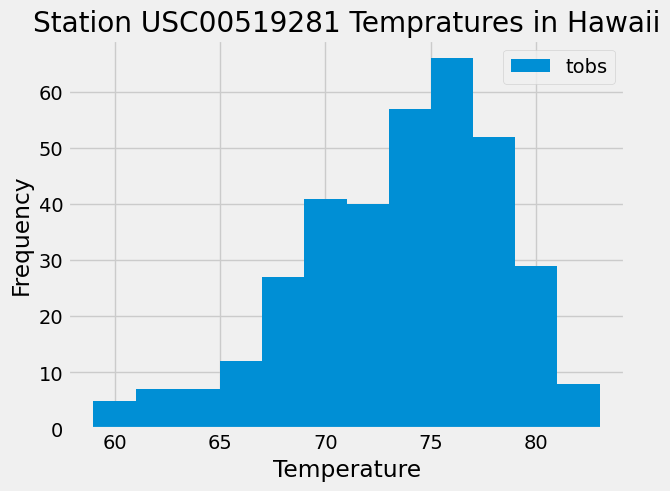

In [18]:
results_3 = session.query(Measurement.tobs).\
    filter (Measurement.station == "USC00519281").\
    filter(Measurement.date > '2016-08-23').all()
results_3 = pd.DataFrame (results_3)
results_3.plot.hist(bins=12, title="Station USC00519281 Tempratures in Hawaii", ylabel='Frequency', xlabel='Temperature')
plt.show()

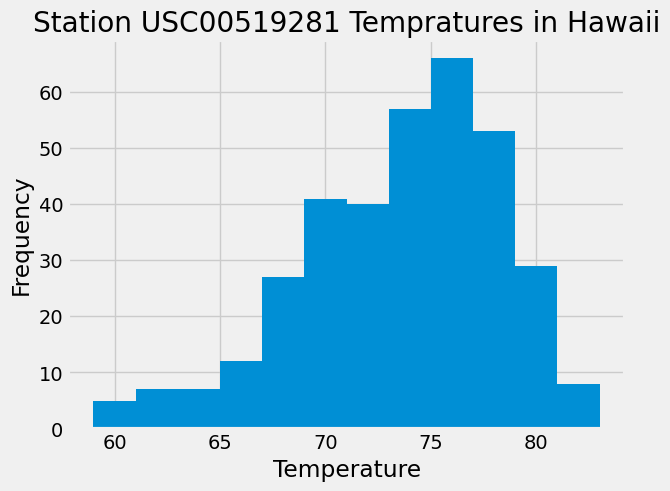

In [19]:
df_6.tobs.plot.hist(bins=12, title="Station USC00519281 Tempratures in Hawaii", ylabel='Frequency', xlabel='Temperature')
plt.show()

# Close Session

In [20]:
# Close Session
session.close()